#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:

from dotenv import load_dotenv
import os
import wandb

load_dotenv()

WANDB_API_KEY = os.getenv("WANDB_API_KEY")
wandb.login(key=WANDB_API_KEY)

wandb.init(project='distance_classification_project')


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/arnavmehta/.netrc
wandb: Currently logged in as: arnavmehta (diff-lm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
!wget -O haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2025-02-26 02:32:07--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  4.25MB/s    in 0.2s    

2025-02-26 02:32:08 (4.25 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [3]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "face" ## The text you want to write
font = cv2.FONT_HERSHEY_COMPLEX  ## Font type
font_scale = 1  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total num faces: {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2025-02-26 02:47:00.257 python[11564:140775] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-26 02:47:00.257 python[11564:140775] +[IMKInputSession subclass]: chose IMKInputSession_Modern


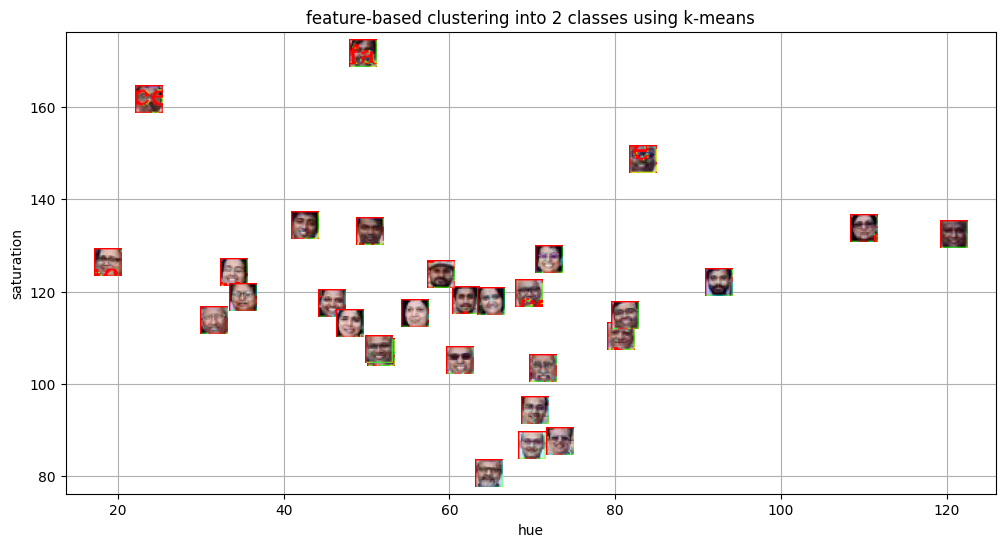

In [4]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('feature-based clustering into 2 classes using k-means')
plt.grid(True)
plt.show()

## Put x label
## Put y label
## Put title
## Put grid
## show the plot

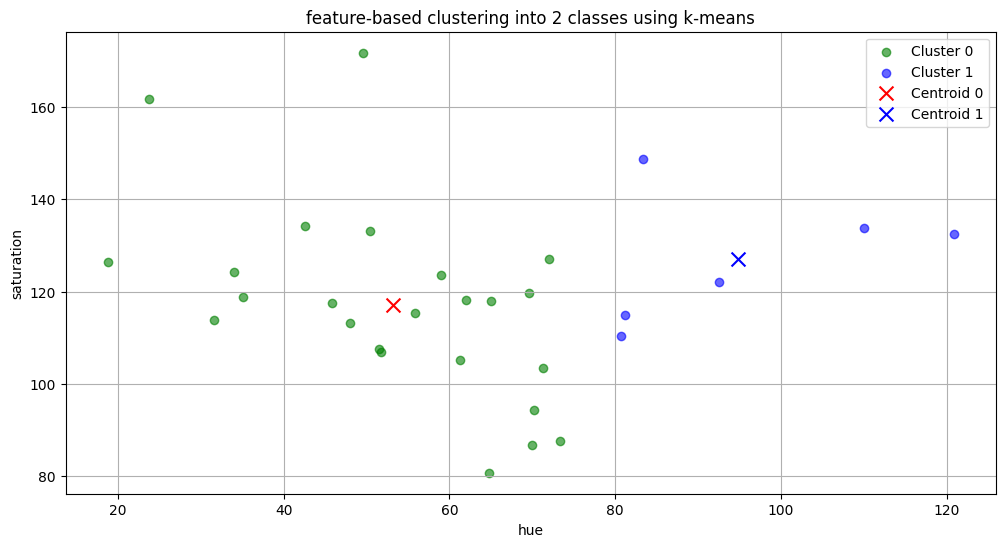

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0', alpha=0.6)


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1', alpha=0.6)

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', label='Centroid 0', marker='x', s=100)
plt.scatter(centroid_1[0], centroid_1[1], c='blue', label='Centroid 1', marker='x', s=100)


plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('feature-based clustering into 2 classes using k-means')
plt.legend()
plt.grid(True)
plt.show()

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## Show the plot


In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

# Detect face  in the template image after converting it to gray and store it in template_faces
print('detecting faces')
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY), 1.05, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    print('drawing rectangles...')
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow(f"Total num faces: {len(template_faces)}", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

detecting faces
drawing rectangles...


/var/folders/js/t5znrx9j42b0jz1d9lwpwx3w0000gn/T/ipykernel_11564/2456410699.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


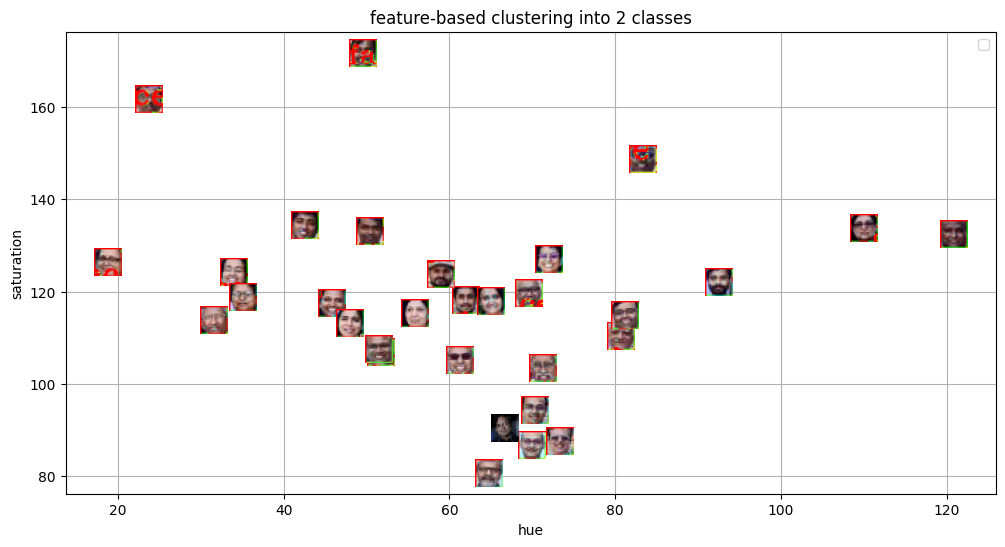

In [22]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict(np.array([[template_hue, template_saturation]]))[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('feature-based clustering into 2 classes')
plt.legend()
plt.grid(True)
wandb.log({'plot2': wandb.Image(plt)})
plt.show()

## Put x label
## Put y label
## Put title
## Add grid
## show plot

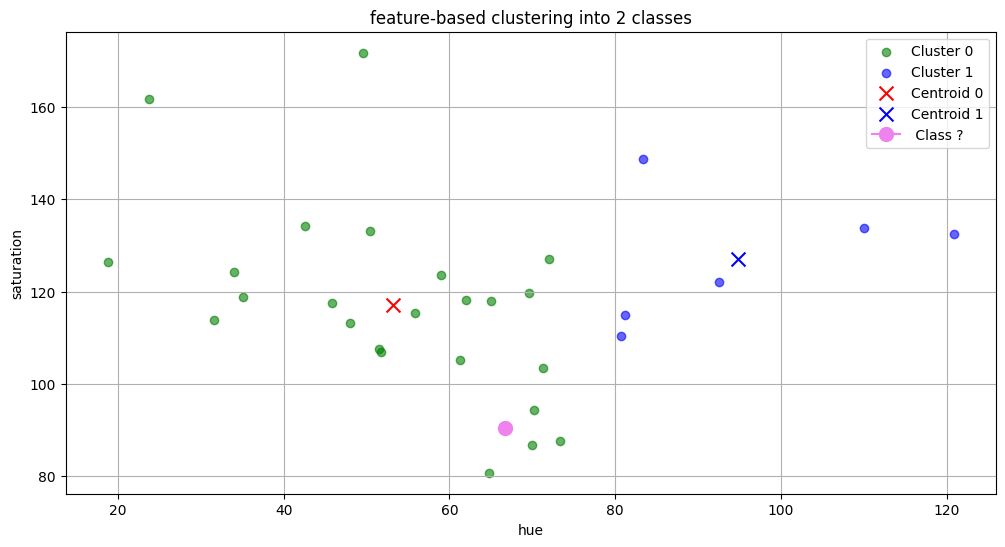

In [21]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0', alpha=0.6)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1', alpha=0.6)

# Calculate and plot centroids for both the clusters
centroid_0 = centroids[0]
centroid_1 = centroids[1]
plt.scatter(centroid_0[0], centroid_0[1], c='red', label='Centroid 0', marker='x', s=100)
plt.scatter(centroid_1[0], centroid_1[1], c='blue', label='Centroid 1', marker='x', s=100)
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('feature-based clustering into 2 classes')
plt.legend()
plt.grid(True)
wandb.log({'plot': wandb.Image(plt)})
plt.show()

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
                                            ## End of the lab 5 ##

In [10]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 30.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:

# Log basic metrics
metrics = {
    'num_faces_detected': len(faces_rect),
    'num_clusters': 2,
    'cluster_0_size': len(cluster_0_points),
    'cluster_1_size': len(cluster_1_points),
}

# Log the metrics
wandb.log(metrics)

# Create a simple table of results
table = wandb.Table(columns=['cluster_id', 'num_faces'])
table.add_data(0, len(cluster_0_points))
table.add_data(1, len(cluster_1_points))
wandb.log({'cluster_sizes': table})


cluster_0_size,▁▁▁▁
cluster_1_size,▁▁▁▁
num_clusters,▁▁▁▁
num_faces_detected,▁▁▁▁
cluster_0_size,24
cluster_1_size,6
num_clusters,2
num_faces_detected,30


<Figure size 640x480 with 0 Axes>

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
- Euclidean Distance
- Minkowski Distance
- Mahalanobis Distance
- Manhattan Distance
- Hamming Distance
- Cosine Distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
- Face Recognition
- Image Classification
- Text Classification
- Anomaly Detection
- Recommender Systems
- Medical Diagnosis
- Fraud Detection

#### 3. Explain various distance metrics. 
- Euclidean Distance: Most simple, to calculate distance linear distance between two points in a plane.
- Manhattan Distance: Sum of absolute differences between coordinates.
- Minkowski Distance: Generalization of Euclidean and Manhattan distances.
- Mahalanobis Distance: Includes Variance as a factor while trying to calculate distance.
- Cosine Distance: Angle between vectors is used to represent distance.
- Hamming Distance: Number of positions at which corresponding bits are different.

#### 4. What is the role of cross validation in model performance? 
- Cross Validation is used to evaluate the performance of a model.
- Generalization is evaluated
- Helps in hyperparameter tuning
- Helps to see what combination or model is best for the data
- Prevents overfitting by chunking data

#### 5. Explain variance and bias in terms of KNN? 
Variance: How much the model is affected by the noise in the data. -- High Variance means unstable model, lower variance means more stable model.
Bias: How much the model is affected by the bias in the data. -- High Bias means the model is not flexible enough to fit the data, lower bias means the model is more flexible.

Both of above are dependent on the K value. 
K is directly proportional to the variance and inversely proportional to the bias.

We need to make sure K is not too high or too low and should be optimal
